## Santiago Montes de Oca || 09/09/2025 || Procesamiento Masivo de Datos

counting words:
output
apple: 3
banana: 2
orange: 3

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Dag, we need to submit this") \
    .master("spark://8653e762d846:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/09 14:44:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
words = ["apple", "banana", "apple", "orange",
"banana", "apple", "orange", "orange"]
words_rdd = sc.parallelize(words)

In [4]:
mapped_rdd = words_rdd.map(lambda x: (x, 1))
mapped_rdd.collect()

[('apple', 1),
 ('banana', 1),
 ('apple', 1),
 ('orange', 1),
 ('banana', 1),
 ('apple', 1),
 ('orange', 1),
 ('orange', 1)]

In [5]:
reduced_rdd = mapped_rdd.reduceByKey(lambda a, b: a+b)
reduced_rdd.collect()

[('banana', 2), ('orange', 3), ('apple', 3)]

In [6]:
listToPrint = reduced_rdd.collect()
for x in listToPrint:
    print(f"{x[0]}: {x[1]}")



banana: 2
orange: 3
apple: 3


# the dag stages are confusing im not gonna lie

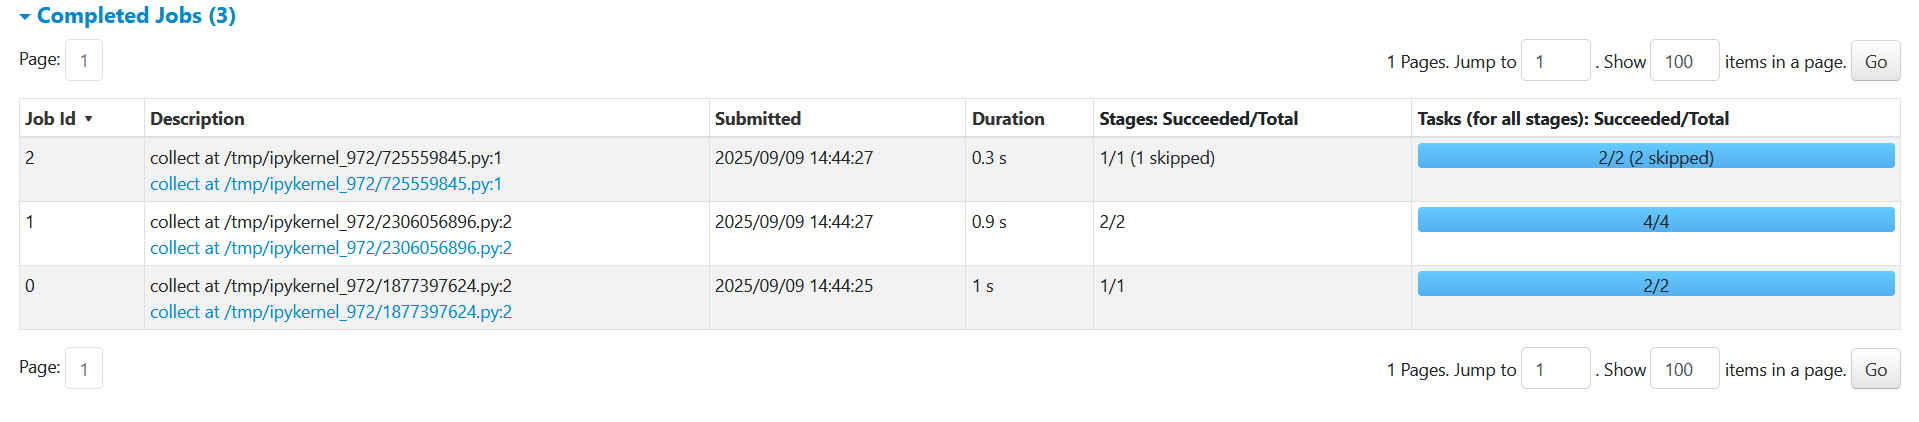

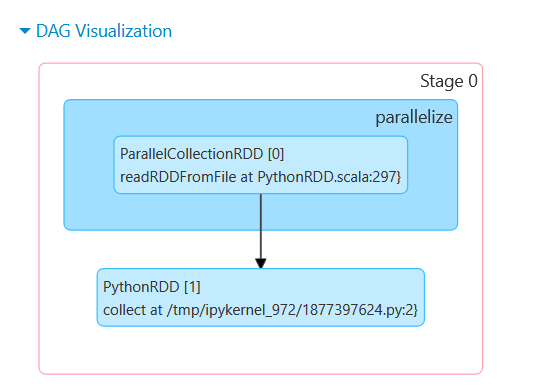

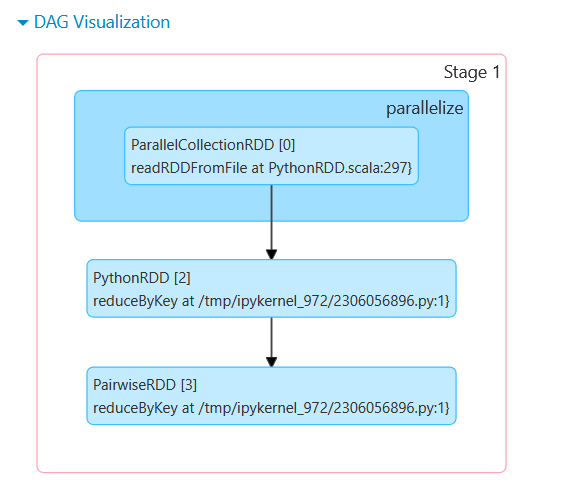

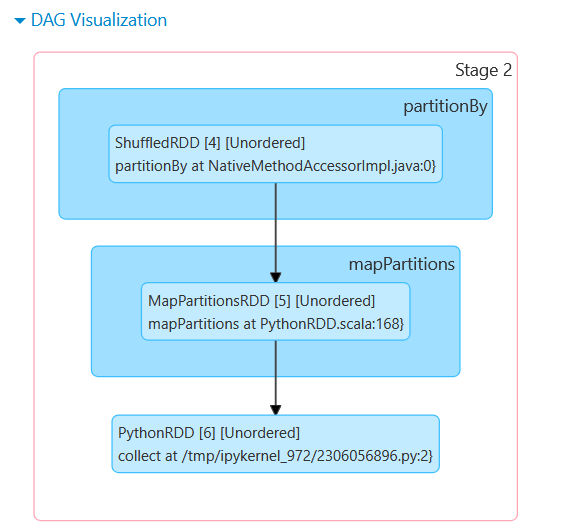

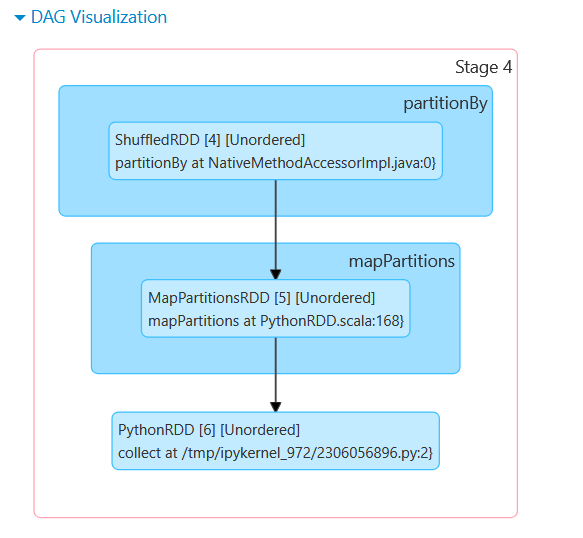